<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title></title>
</head>
<body>
    <p><b><span style="color:purple;">REGRESSION TECHNIQUES.</span></b></p>
    
</body>
</html>


In [343]:
#Importing libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Importing models
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [344]:
#Loading the dataset and performing necessay EDA

df = pd.read_csv("D:/3rd SEM/tips (data for regression problem) (1).csv")

# Handle missing values if any
df.fillna(method='ffill', inplace=True)




C:\Users\Devanshi\AppData\Local\Temp\ipykernel_66940\3326193383.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [345]:
#Coverting gender into binary
# Mapping Gender directly
df['sex'] = df['sex'].map({'Female': 0, 'Male': 1})

print(df)


     total_bill   tip  sex smoker   day    time  size
0         16.99  1.01    0     No   Sun  Dinner     2
1         10.34  1.66    1     No   Sun  Dinner     3
2         21.01  3.50    1     No   Sun  Dinner     3
3         23.68  3.31    1     No   Sun  Dinner     2
4         24.59  3.61    0     No   Sun  Dinner     4
..          ...   ...  ...    ...   ...     ...   ...
239       29.03  5.92    1     No   Sat  Dinner     3
240       27.18  2.00    0    Yes   Sat  Dinner     2
241       22.67  2.00    1    Yes   Sat  Dinner     2
242       17.82  1.75    1     No   Sat  Dinner     2
243       18.78  3.00    0     No  Thur  Dinner     2

[244 rows x 7 columns]


In [346]:
#Coverting gender into binary
# Mapping Gender directly
df['smoker'] = df['smoker'].map({'No': 0, 'Yes': 1})

print(df)

     total_bill   tip  sex  smoker   day    time  size
0         16.99  1.01    0       0   Sun  Dinner     2
1         10.34  1.66    1       0   Sun  Dinner     3
2         21.01  3.50    1       0   Sun  Dinner     3
3         23.68  3.31    1       0   Sun  Dinner     2
4         24.59  3.61    0       0   Sun  Dinner     4
..          ...   ...  ...     ...   ...     ...   ...
239       29.03  5.92    1       0   Sat  Dinner     3
240       27.18  2.00    0       1   Sat  Dinner     2
241       22.67  2.00    1       1   Sat  Dinner     2
242       17.82  1.75    1       0   Sat  Dinner     2
243       18.78  3.00    0       0  Thur  Dinner     2

[244 rows x 7 columns]


In [347]:
day_mapping = {
    'Mon': 0,
    'Tues': 1,
    'Wed': 2,
    'Thur': 3,
    'Fri': 4,
    'Sat': 5,
    'Sun': 6
}

# Apply the mapping to the 'Day' column
df['day'] = df['day'].map(day_mapping)
print(df)

     total_bill   tip  sex  smoker  day    time  size
0         16.99  1.01    0       0    6  Dinner     2
1         10.34  1.66    1       0    6  Dinner     3
2         21.01  3.50    1       0    6  Dinner     3
3         23.68  3.31    1       0    6  Dinner     2
4         24.59  3.61    0       0    6  Dinner     4
..          ...   ...  ...     ...  ...     ...   ...
239       29.03  5.92    1       0    5  Dinner     3
240       27.18  2.00    0       1    5  Dinner     2
241       22.67  2.00    1       1    5  Dinner     2
242       17.82  1.75    1       0    5  Dinner     2
243       18.78  3.00    0       0    3  Dinner     2

[244 rows x 7 columns]


In [348]:
df['time'] = df['time'].map({'Lunch': 0, 'Dinner': 1})
print(df)

     total_bill   tip  sex  smoker  day  time  size
0         16.99  1.01    0       0    6     1     2
1         10.34  1.66    1       0    6     1     3
2         21.01  3.50    1       0    6     1     3
3         23.68  3.31    1       0    6     1     2
4         24.59  3.61    0       0    6     1     4
..          ...   ...  ...     ...  ...   ...   ...
239       29.03  5.92    1       0    5     1     3
240       27.18  2.00    0       1    5     1     2
241       22.67  2.00    1       1    5     1     2
242       17.82  1.75    1       0    5     1     2
243       18.78  3.00    0       0    3     1     2

[244 rows x 7 columns]


In [349]:
#Spliting the data into feature and target variables
X = df.drop('tip', axis=1)
y = df['tip']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (for models like KNN, SVR, Ridge/Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'SVR': SVR(),
    'KNN Regression': KNeighborsRegressor()
}


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title></title>
</head>
<body>
    <p><b><span style="color:purple;">Now, Implementing the models with coefficients of regression and plotting the residual plot .</span></b></p>
</body>
</html>

# Linear Regression

Model Evaluation:
MAE: 0.6686
MSE: 0.6963
R²: 0.4429

Linear Regression Coefficients:
Feature 1: 0.8200
Feature 2: 0.0122
Feature 3: -0.0871
Feature 4: 0.0692
Feature 5: -0.0815
Feature 6: 0.2202


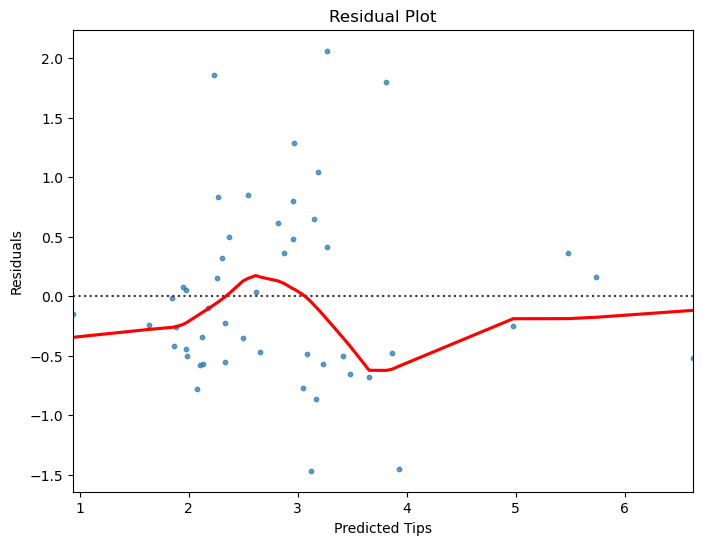

In [352]:
# Build and Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Prediction of the Tip for Test Data
y_pred = model.predict(X_test_scaled)

# Evaluating the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Displaying the coefficients for each feature
coefficients = ridge_model.coef_
print("\nLinear Regression Coefficients:")
for i, coef in enumerate(coefficients):
    print(f"Feature {i+1}: {coef:.4f}")


# Residual Plot
# Calculate residuals
residuals = y_test - y_pred

# Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'}, scatter_kws={'s': 10, 'alpha': 0.7})
plt.title("Residual Plot")
plt.xlabel("Predicted Tips")
plt.ylabel("Residuals")
plt.show()



#  Ridge Regression

Ridge Regression Model Evaluation:
MAE: 0.6683
MSE: 0.6951
R²: 0.4439

Ridge Regression Coefficients:
Feature 1: 0.8200
Feature 2: 0.0122
Feature 3: -0.0871
Feature 4: 0.0692
Feature 5: -0.0815
Feature 6: 0.2202


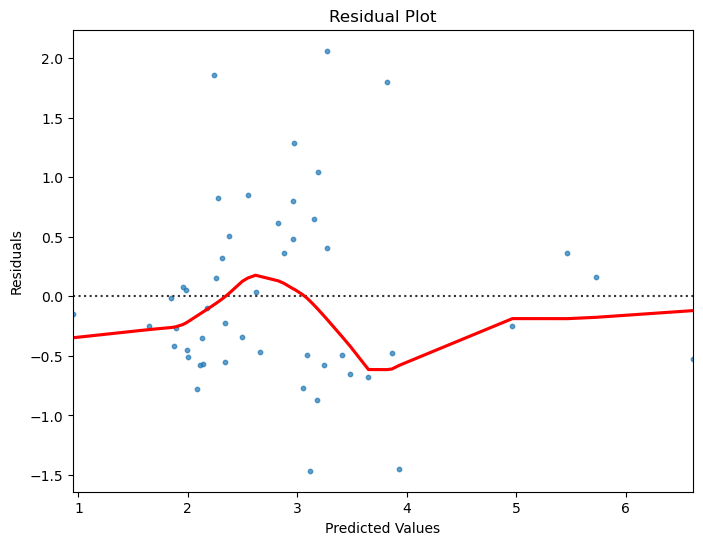

In [354]:
# Build and Train the Ridge Regression Model
ridge_model = Ridge(alpha=1.0)  # Regularization strength (adjust alpha as needed)
ridge_model.fit(X_train_scaled, y_train)

# Prediction of the Target for Test Data
y_pred = ridge_model.predict(X_test_scaled)

# Evaluating the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Ridge Regression Model Evaluation:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Displaying the coefficients for each feature
coefficients = ridge_model.coef_
print("\nRidge Regression Coefficients:")
for i, coef in enumerate(coefficients):
    print(f"Feature {i+1}: {coef:.4f}")


# Residual Plot
# Calculate residuals
residuals = y_test - y_pred

# Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'}, scatter_kws={'s': 10, 'alpha': 0.7})
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Lasso Regression

Lasso Regression Model Evaluation:
MAE: 0.6548
MSE: 0.6122
R²: 0.5102

Lasso Regression Coefficients:
Feature 1: 0.7312
Feature 2: 0.0000
Feature 3: -0.0000
Feature 4: 0.0000
Feature 5: 0.0000
Feature 6: 0.1848


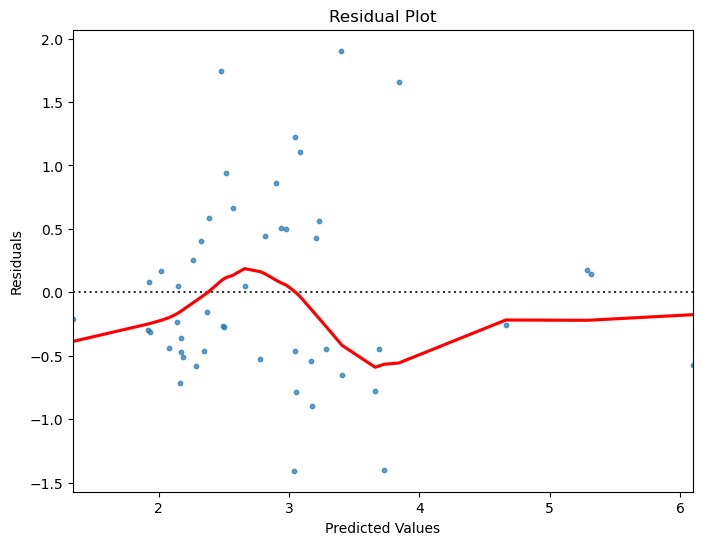

In [356]:
# Build and Train the Lasso Regression Model
lasso_model = Lasso(alpha=0.1)  # Regularization strength (adjust alpha as needed)
lasso_model.fit(X_train_scaled, y_train)

# Prediction of the Target for Test Data
y_pred = lasso_model.predict(X_test_scaled)

# Evaluating the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Lasso Regression Model Evaluation:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Displaying the coefficients for each feature
coefficients = lasso_model.coef_
print("\nLasso Regression Coefficients:")
for i, coef in enumerate(coefficients):
    print(f"Feature {i+1}: {coef:.4f}")

# Residual Plot
# Calculate residuals
residuals = y_test - y_pred

# Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'}, scatter_kws={'s': 10, 'alpha': 0.7})
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


# Decision Tree Regression

Decision Tree Regression Model Evaluation:
MAE: 0.8349
MSE: 1.1859
R²: 0.0513

Decision Tree Regression Coefficients:
Feature 1: 0.8200
Feature 2: 0.0122
Feature 3: -0.0871
Feature 4: 0.0692
Feature 5: -0.0815
Feature 6: 0.2202


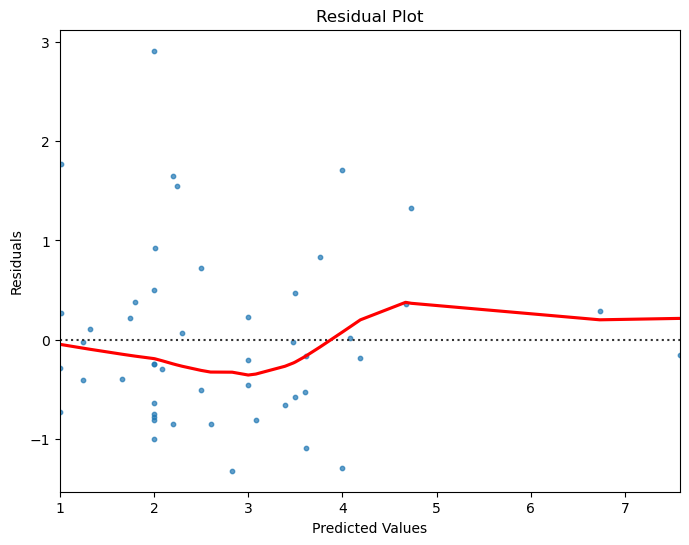

In [358]:
# Build and Train the Decision Tree Regression Model
tree_model = DecisionTreeRegressor(random_state=42)  # Decision tree regressor (no alpha parameter like in Lasso or Ridge)
tree_model.fit(X_train_scaled, y_train)

# Prediction of the Target for Test Data
y_pred = tree_model.predict(X_test_scaled)

# Evaluating the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree Regression Model Evaluation:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Displaying the coefficients for each feature
coefficients = ridge_model.coef_
print("\nDecision Tree Regression Coefficients:")
for i, coef in enumerate(coefficients):
    print(f"Feature {i+1}: {coef:.4f}")

# Residual Plot
# Calculate residuals
residuals = y_test - y_pred

# Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'}, scatter_kws={'s': 10, 'alpha': 0.7})
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


# Random Forest Regression 

Random Forest Regression Model Evaluation:
MAE: 0.7821
MSE: 0.9588
R²: 0.2329

Random Forest Regression Coefficients:
Feature 1: 0.8200
Feature 2: 0.0122
Feature 3: -0.0871
Feature 4: 0.0692
Feature 5: -0.0815
Feature 6: 0.2202


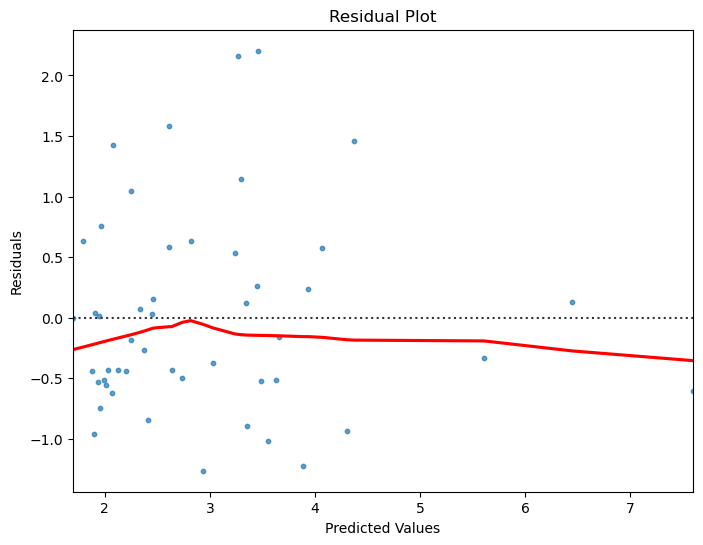

In [360]:
# Build and Train the Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees, you can tune this
rf_model.fit(X_train_scaled, y_train)

# Prediction of the Target for Test Data
y_pred = rf_model.predict(X_test_scaled)

# Evaluating the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regression Model Evaluation:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Displaying the coefficients for each feature
coefficients = ridge_model.coef_
print("\nRandom Forest Regression Coefficients:")
for i, coef in enumerate(coefficients):
    print(f"Feature {i+1}: {coef:.4f}")

# Residual Plot
# Calculate residuals
residuals = y_test - y_pred

# Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'}, scatter_kws={'s': 10, 'alpha': 0.7})
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


# Support Vector Regression (SVR)


SVR Model Evaluation:
MAE: 0.8045
MSE: 1.0950
R²: 0.1240

SVR Regression Coefficients:
Feature 1: 0.8200
Feature 2: 0.0122
Feature 3: -0.0871
Feature 4: 0.0692
Feature 5: -0.0815
Feature 6: 0.2202


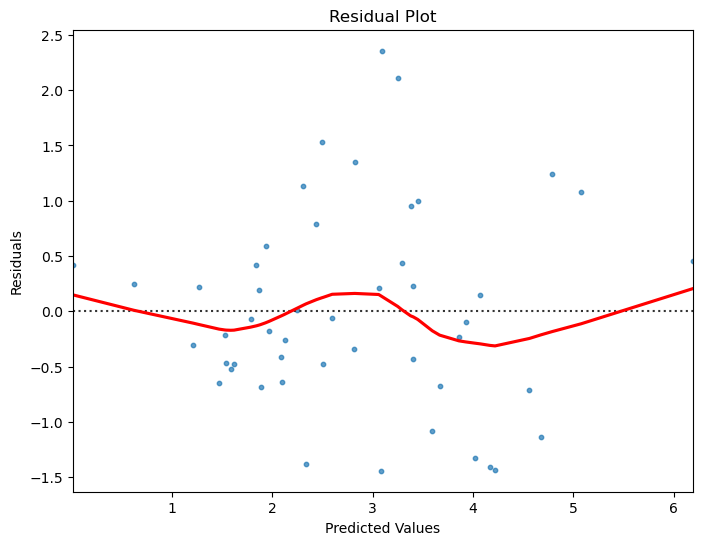

In [362]:
# Build and Train the Support Vector Regression (SVR) Model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)  # rbf kernel is commonly used in SVR
svr_model.fit(X_train_scaled, y_train)

# Prediction of the Target for Test Data
y_pred = svr_model.predict(X_test_scaled)

# Evaluating the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"SVR Model Evaluation:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Displaying the coefficients for each feature
coefficients = ridge_model.coef_
print("\nSVR Regression Coefficients:")
for i, coef in enumerate(coefficients):
    print(f"Feature {i+1}: {coef:.4f}")


# Residual Plot
# Calculate residuals
residuals = y_test - y_pred

# Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'}, scatter_kws={'s': 10, 'alpha': 0.7})
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


# KNN Regression 

KNN Regression Model Evaluation:
MAE: 0.7259
MSE: 0.7550
R²: 0.3960

KNN Regression Coefficients:
Feature 1: 0.8200
Feature 2: 0.0122
Feature 3: -0.0871
Feature 4: 0.0692
Feature 5: -0.0815
Feature 6: 0.2202


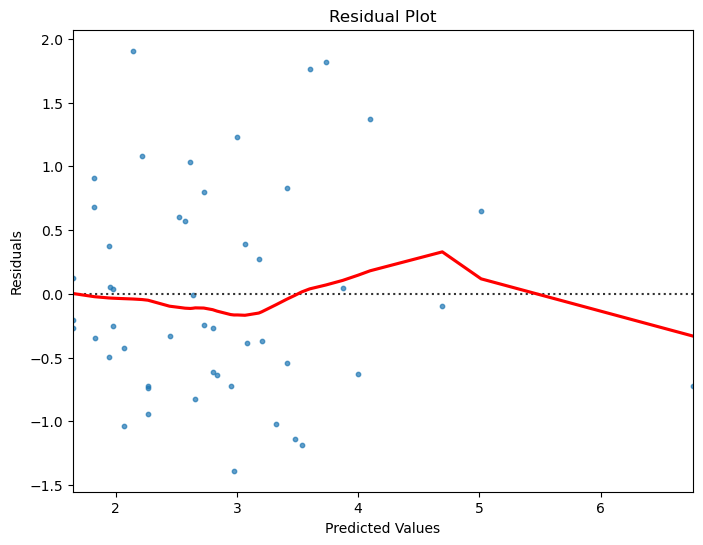

In [364]:
# Build and Train the KNN Regression Model
knn_model = KNeighborsRegressor(n_neighbors=5)  # k=5, you can adjust this value
knn_model.fit(X_train_scaled, y_train)

# Prediction of the Target for Test Data
y_pred = knn_model.predict(X_test_scaled)

# Evaluating the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"KNN Regression Model Evaluation:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Displaying the coefficients for each feature
coefficients = ridge_model.coef_
print("\nKNN Regression Coefficients:")
for i, coef in enumerate(coefficients):
    print(f"Feature {i+1}: {coef:.4f}")
    
# Residual Plot
# Calculate residuals
residuals = y_test - y_pred

# Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'}, scatter_kws={'s': 10, 'alpha': 0.7})
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


# Conclusions 

**On comparing the R2 value for all the models, we can say that Lasso regression(R²: 0.5102 ) best fits for this dataset.**
**  **
**After averaging and comparing the values of the coefficient of regression model, we can say that the factor significantly impacting the tip value is the total bill followed by the size.**

**  **


# Feature Importance in Lasso Regression

**Since Lasso regression fits the best, we will show Regularization and Feature Importance using it**

Lasso Regression Model Evaluation:
R²: 0.5102
MAE: 0.6548
RMSE: 0.7824
MAPE: 29.00%


C:\Users\Devanshi\AppData\Local\Temp\ipykernel_66940\4069369629.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Abs_Coefficient', y='Feature', data=non_zero_importance, palette='viridis')


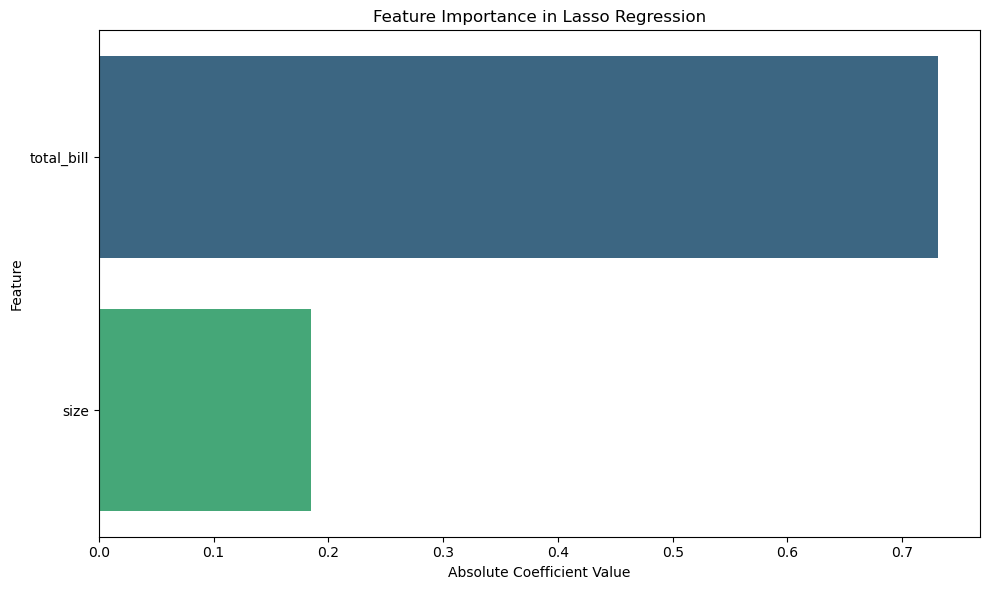

In [370]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Example Data (replace with your actual dataset)
# Assuming X_train_scaled, y_train, X_test_scaled, y_test are already defined

# Initialize Lasso Regression model
lasso = Lasso(alpha=0.1)  # Regularization strength (alpha) can be tuned

# Train the model
lasso.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = lasso.predict(X_test_scaled)

# Calculate performance metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAPE (Mean Absolute Percentage Error)
# Avoid division by zero by checking for zero values in y_test
# Only compute MAPE for non-zero true values
mape = np.mean(np.abs((y_test - y_pred) / (y_test + np.finfo(float).eps))) * 100  # Adding epsilon to avoid division by zero

print(f"Lasso Regression Model Evaluation:")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")  # Accuracy as MAPE

# Visualizing Feature Importance using Lasso coefficients
coefficients = lasso.coef_  # Get the coefficients
features = X.columns  # The feature names

# Create a DataFrame to store feature names and their corresponding coefficients
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Sort the features based on the absolute value of the coefficients
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Filter out features with zero importance
non_zero_importance = feature_importance_df[feature_importance_df['Coefficient'] != 0]

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=non_zero_importance, palette='viridis')
plt.title('Feature Importance in Lasso Regression')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



# Relationship between the target variable and predictors ()

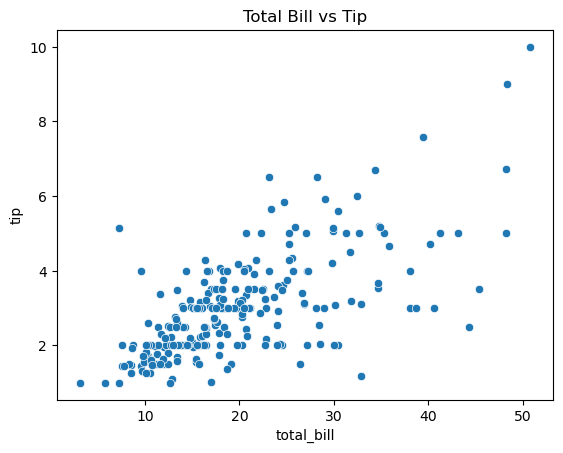

In [374]:
# Scatter plot: Total bill vs Tip
sns.scatterplot(data=df, x='total_bill', y='tip')
plt.title('Total Bill vs Tip')
plt.show()

**Although it is very scattered, still we can  see that when total bill increases, the tip amount is suppose to increase**

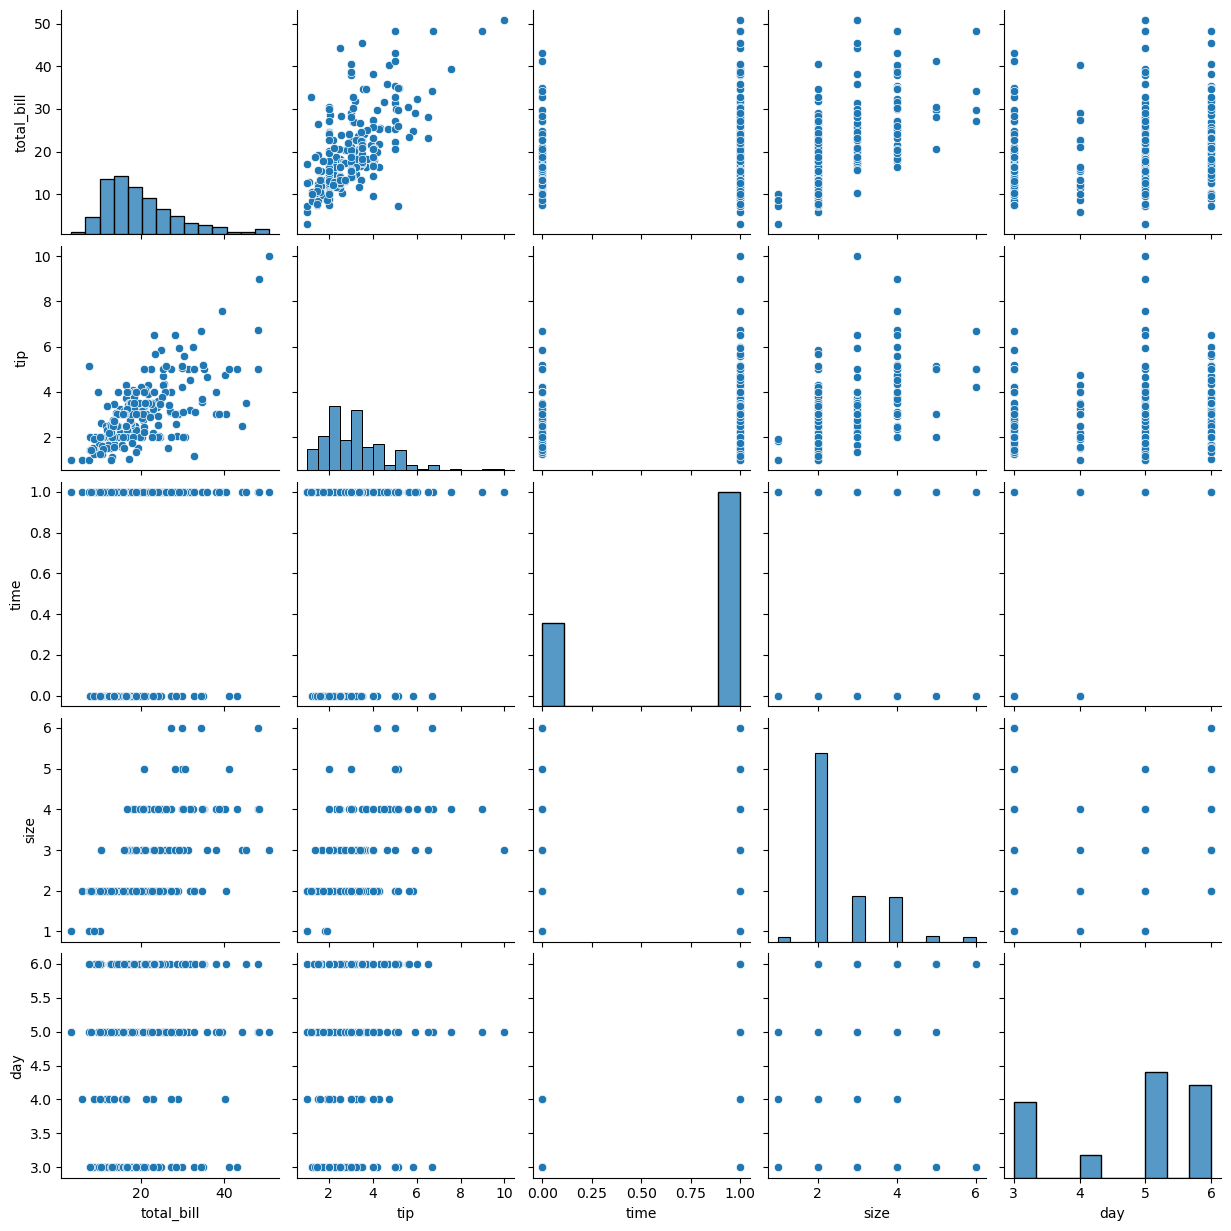

In [400]:
sns.pairplot(df[['total_bill', 'tip','time', 'size', 'day']])
plt.show()

**Clearly we can see that the the tip amount increaes at dinner time compared to lunch.**

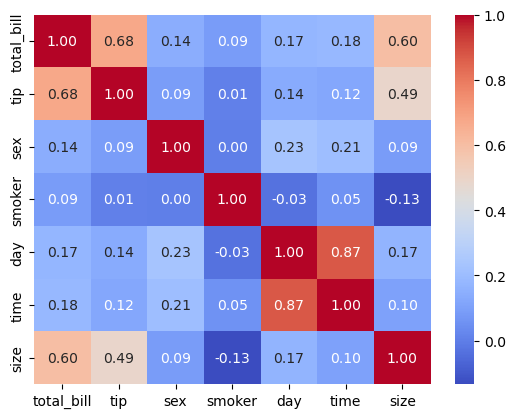

In [377]:
# Compute the correlation matrix
corr = df.corr()

# Heatmap of correlations
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

**Using the heatmap, we can see there is a relationship between day and the time when the customers come.**
** **
**Clear relationship between tip and the total bill**
** **
**Also relationship between size and the total bill exits**

In [379]:
# Rainbow test

import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

# Define X and y
X = df[['total_bill', 'size', 'time']]  # Exclude 'tip' from X
X = sm.add_constant(X)  # Add intercept
y = df['tip']

# Fit the model
model = sm.OLS(y, X).fit()

test_statistic, p_value = linear_rainbow(model)
print(f'Rainbow Test p-value: {p_value}')

Rainbow Test p-value: 0.17736955773337454


**Since the p value is greater than (0.05) we can say that there is linear dependency**

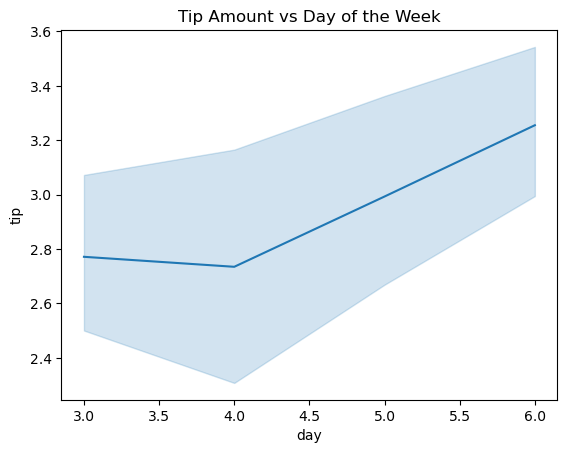

In [381]:
sns.lineplot(data=df, x='day', y='tip')
plt.title('Tip Amount vs Day of the Week')
plt.show()


**Clearly we can say that the customers usually come on the weekends. From monday to thursday there is steady rush at the hotel. But right from Friday to sunday we see sudden linear rise in the graph**

# Insights for Management

**1. Increasing the total bill amount**

Encourage upselling techniques to increase the total bill per table, such as recommending premium items or pairing suggestions. Also a discount offer on a minimum amount of total bill can make the customer to spend a higher amount of money. 

**2. Focus on time of the day**

The time of day (lunch vs. dinner) affects tipping behavior, with dinner times often associated with higher bills and tips. Therefore proper staffing and facilities should be provided at dinner time.
Also the concept of "happy hour" can be established so that customers are attracted to come at the night hours.

**3. Party Size and Service Enhancement Training**

Proper training should be given to the staff members and the chefs to maximize the output to effectively accommodate large party size.This will make sure that they won't miss the chance to get tip, when the size is more.

**4.Time-Specific Promotions**

Launch promotions that target lower tipping periods to balance revenue throughout the day.

**5. Weekend special offers**

Offer special offers starting from friday to sunday like
1. Combo Deals and Bundles: Create combo meals or bundles that provide customers with value while raising the bill total.
2. Limited-Time Offers: Implement promotions that are only available on weekends to encourage diners to opt for special items.
